In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
## SET50
tickers = pd.read_html("https://en.wikipedia.org/wiki/SET50_Index_and_SET100_Index")[0][
    "Symbol"
].values

In [10]:
# tickers = [
#     "AAV", "ADVANC", "AEONTS", "AMATA", "AOT", "AP", "AURA", "AWC", "BAM", "BANPU",
#     "BBL", "BCH", "BCP", "BCPG", "BDMS", "BEM", "BGRIM", "BH", "BLA", 
#     # "BSRC",
#     "BTG", "BTS", "BYD", "CBG", "CENTEL", "CHG", "CK", "COM7", "CPALL", "CPF",
#     "CPN", "CRC", "DELTA", "DOHOME", "EA", "EGCO", "ERW", "FORTH", "GLOBAL", "GPSC",
#     "GULF", "GUNKUL", "HANA", "HMPRO", "ICHI", "INTUCH", "IRPC", "ITC", "IVL", "JMART",
#     "JMT", "KBANK", "KCE", "KKP", "KTB", "KTC", "LH", "M", "MEGA", "MINT",
#     "MOSHI", "MTC", "NEX", "OR", "ORI", "OSP", "PLANB", "PTT", "PTTEP", "PTTGC",
#     "RATCH", "RBF", "RCL", "SAPPE", "SAWAD", "SCB", "SCC", "SCGP", "SIRI", "SISB",
#     "SJWD", "SNNP", "SPALI", "SPRC", "STA", "STGT", "TASCO", "TCAP", "THG", "TIDLOR",
#     "TISCO", "TKN", "TLI", "TOA", "TOP", "TRUE", "TTB", "TU", "VGI", "WHA"
# ]

In [11]:
tickers

array(['ADVANC', 'AOT', 'AWC', 'BANPU', 'BBL', 'BDMS', 'BEM', 'BGRIM',
       'BH', 'BTS', 'CBG', 'CENTEL', 'COM7', 'CPALL', 'CPF', 'CPN', 'CRC',
       'DELTA', 'EA', 'EGCO', 'GLOBAL', 'GPSC', 'GULF', 'HMPRO', 'INTUCH',
       'IVL', 'KBANK', 'KCE', 'KTB', 'KTC', 'LH', 'MINT', 'MTC', 'OR',
       'OSP', 'PTT', 'PTTEP', 'PTTGC', 'RATCH', 'SAWAD', 'SCB', 'SCC',
       'SCGP', 'TISCO', 'TLI', 'TOP', 'TRUE', 'TTB', 'TU', 'WHA'],
      dtype=object)

In [12]:
tickers_list = [ticker + ".BK" for ticker in tickers]
tickers_list.insert(0, "TDEX.BK")
tickers_list.insert(0, "^SET.BK")

In [13]:
banking = ["BBL.BK", "KBANK.BK", "KTB.BK", "SCB.BK", "TISCO.BK", "TTB.BK"]
commerce = ["COM7.BK", "CPALL.BK", "CRC.BK", "GLOBAL.BK", "HMPRO.BK"]
# construction_materials = ["SCC.BK"]
electronic_components = ["DELTA.BK", "KCE.BK"]
energy_utilities = [
    "BANPU.BK",
    "BGRIM.BK",
    "EA.BK",
    "EGCO.BK",
    "GPSC.BK",
    "GULF.BK",
    "OR.BK",
    "PTT.BK",
    "PTTEP.BK",
    "RATCH.BK",
    "TOP.BK",
]
finance_securities = ["KTC.BK", "MTC.BK", "SAWAD.BK"]
food_beverages = ["CBG.BK", "CPF.BK", "MINT.BK", "OSP.BK", "TU.BK"]
health_care_services = ["BDMS.BK", "BH.BK"]
information_communication_technology = ["ADVANC.BK", "INTUCH.BK", "TRUE.BK"]
# insurance = ["TLI.BK", "TLI.BK"]
petrochemicals_chemicals = ["IVL.BK", "PTTGC.BK"]
property_development = ["AWC.BK", "CPN.BK", "LH.BK", "WHA.BK"]
# tourism_leisure = ["CENTEL.BK", "CENTEL.BK"]
transportation_logistics = ["AOT.BK", "BEM.BK", "BTS.BK"]
# packaging = ["SCGP.BK", "SCGP.BK"]

set50_sectors = {
    "banking": banking,
    "commerce": commerce,
    # "construction_materials": construction_materials,
    "electronic_components": electronic_components,
    "energy_utilities": energy_utilities,
    "finance_securities": finance_securities,
    "food_beverages": food_beverages,
    "health_care_services": health_care_services,
    "information_communication_technology": information_communication_technology,
    # "insurance": insurance,
    "petrochemicals_chemicals": petrochemicals_chemicals,
    "property_development": property_development,
    # "tourism_leisure": tourism_leisure,
    "transportation_logistics": transportation_logistics
    # "packaging": packaging,
}

In [14]:
for i in set50_sectors:
    print(set50_sectors[i])

['BBL.BK', 'KBANK.BK', 'KTB.BK', 'SCB.BK', 'TISCO.BK', 'TTB.BK']
['COM7.BK', 'CPALL.BK', 'CRC.BK', 'GLOBAL.BK', 'HMPRO.BK']
['DELTA.BK', 'KCE.BK']
['BANPU.BK', 'BGRIM.BK', 'EA.BK', 'EGCO.BK', 'GPSC.BK', 'GULF.BK', 'OR.BK', 'PTT.BK', 'PTTEP.BK', 'RATCH.BK', 'TOP.BK']
['KTC.BK', 'MTC.BK', 'SAWAD.BK']
['CBG.BK', 'CPF.BK', 'MINT.BK', 'OSP.BK', 'TU.BK']
['BDMS.BK', 'BH.BK']
['ADVANC.BK', 'INTUCH.BK', 'TRUE.BK']
['IVL.BK', 'PTTGC.BK']
['AWC.BK', 'CPN.BK', 'LH.BK', 'WHA.BK']
['AOT.BK', 'BEM.BK', 'BTS.BK']


In [15]:
sector_correlated_pairs = {}

[*********************100%%**********************]  6 of 6 completed
C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_24324\3138868355.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change()


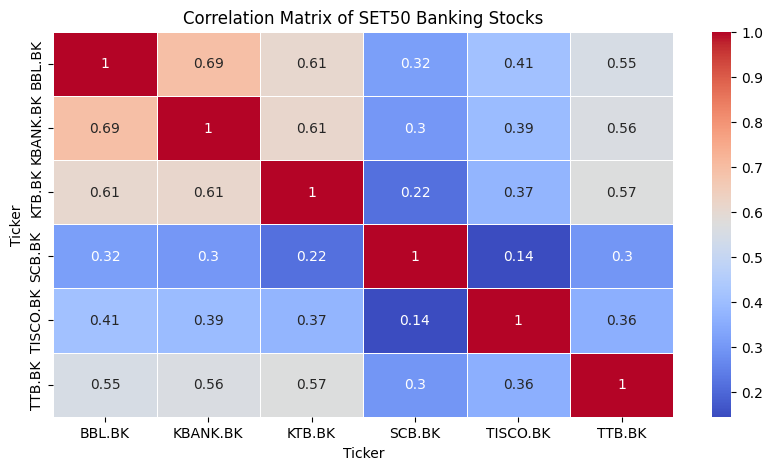

[*********************100%%**********************]  5 of 5 completed


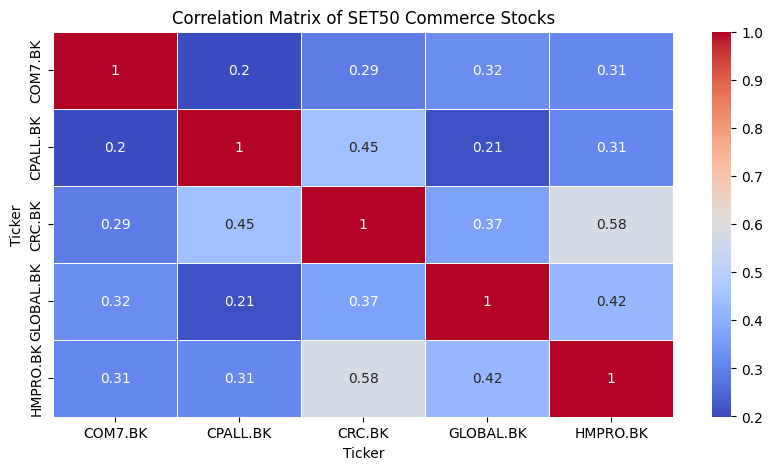

[*********************100%%**********************]  2 of 2 completed


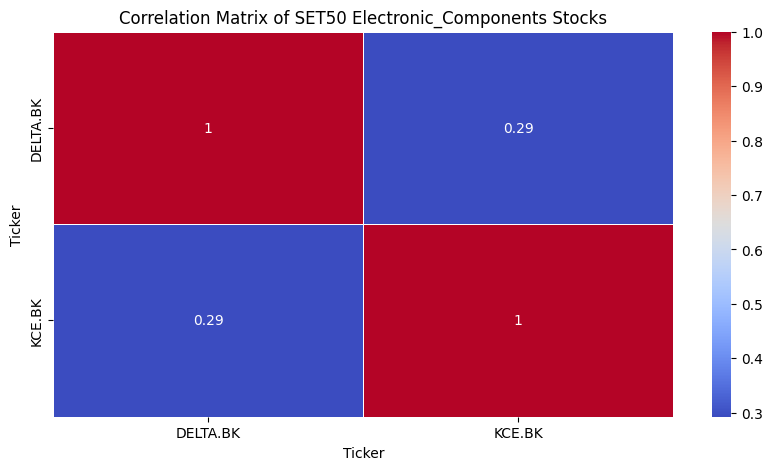

[*********************100%%**********************]  11 of 11 completed


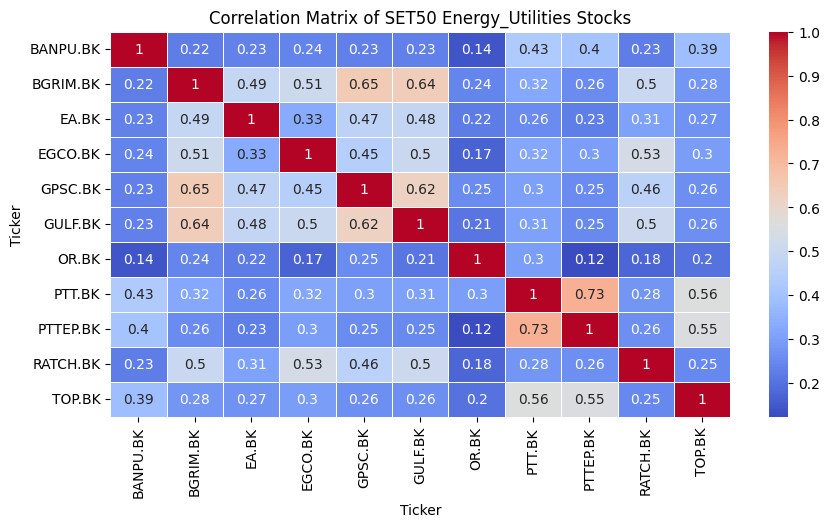

[*********************100%%**********************]  3 of 3 completed


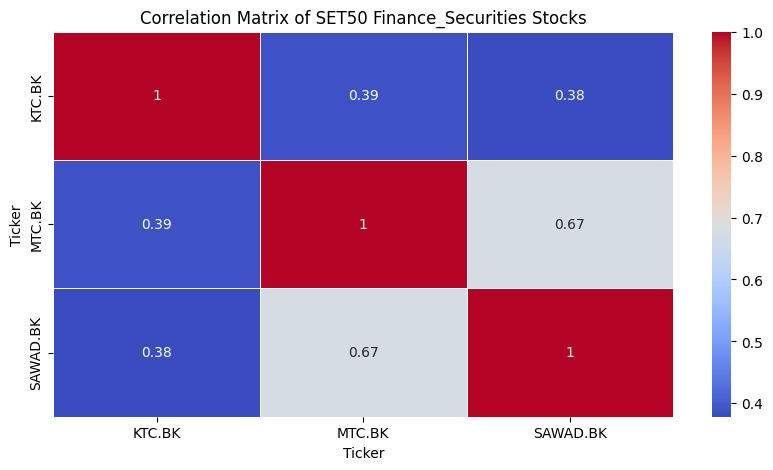

[*********************100%%**********************]  5 of 5 completed


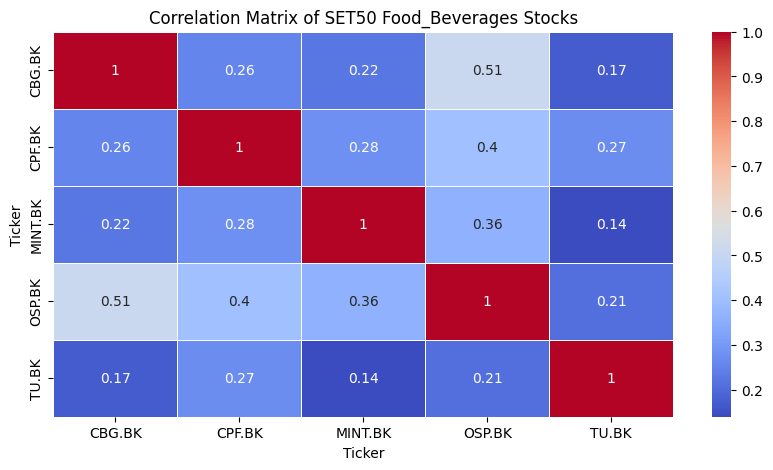

[*********************100%%**********************]  2 of 2 completed


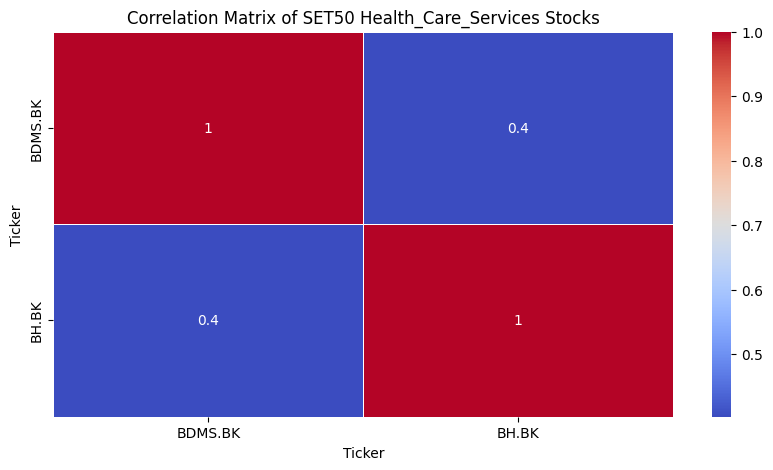

[*********************100%%**********************]  3 of 3 completed


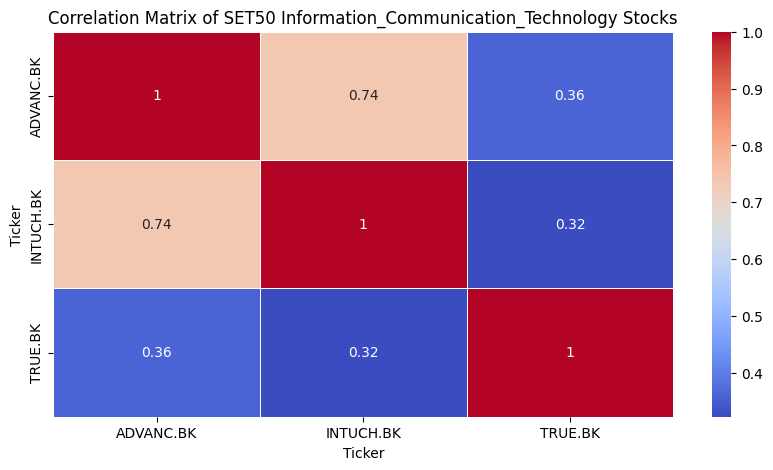

[*********************100%%**********************]  2 of 2 completed


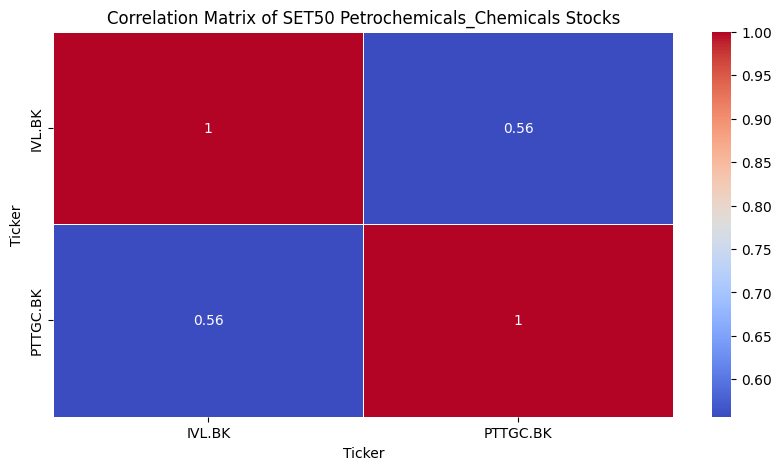

[*********************100%%**********************]  4 of 4 completed


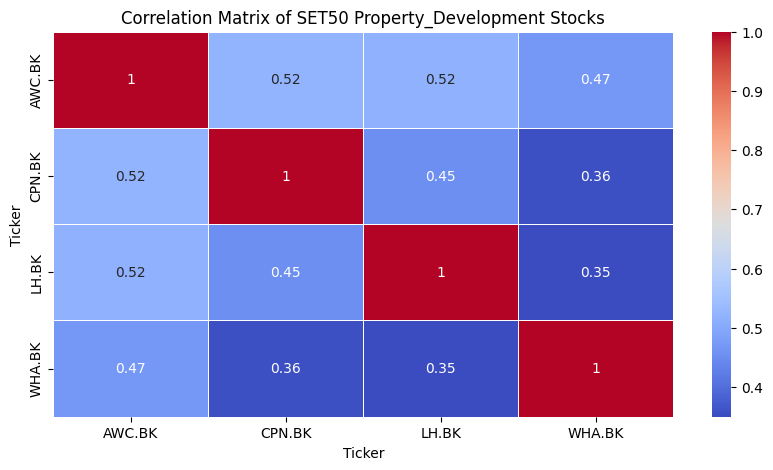

[*********************100%%**********************]  3 of 3 completed


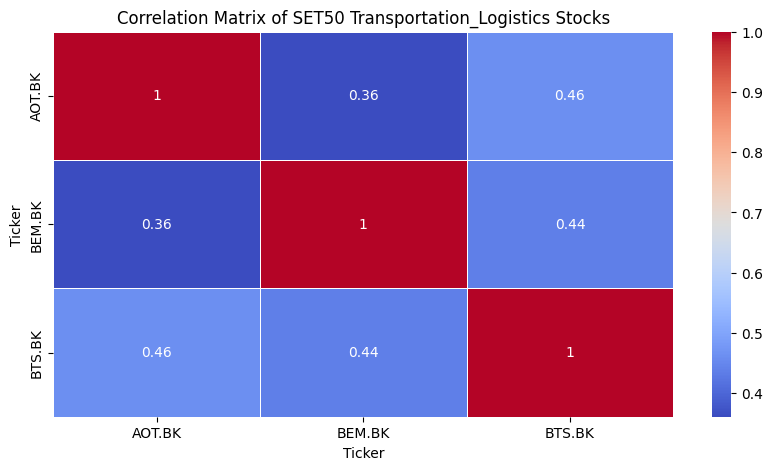

In [16]:
for sector, tickers in set50_sectors.items():
    data = yf.download(tickers, start="2014-01-01", end="2024-01-01")["Adj Close"]
    returns = data.pct_change()
    corr_matrix = returns.corr()

    plt.figure(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Matrix of SET50 {sector.title()} Stocks")
    plt.show()

    threshold = 0.6
    pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

    sector_correlated_pairs[sector] = pairs

In [17]:
for sector, pairs in sector_correlated_pairs.items():
    print(f"{sector.title()}: {pairs}")

Banking: [('BBL.BK', 'KBANK.BK'), ('BBL.BK', 'KTB.BK'), ('KBANK.BK', 'KTB.BK')]
Commerce: []
Electronic_Components: []
Energy_Utilities: [('BGRIM.BK', 'GPSC.BK'), ('BGRIM.BK', 'GULF.BK'), ('GPSC.BK', 'GULF.BK'), ('PTT.BK', 'PTTEP.BK')]
Finance_Securities: [('MTC.BK', 'SAWAD.BK')]
Food_Beverages: []
Health_Care_Services: []
Information_Communication_Technology: [('ADVANC.BK', 'INTUCH.BK')]
Petrochemicals_Chemicals: []
Property_Development: []
Transportation_Logistics: []


In [18]:
# for i in set50_sectors:
#     data = yf.download(set50_sectors[i], start="2020-01-01", end="2024-01-01")["Adj Close"]
#     returns = data.pct_change()
#     corr_matrix = returns.corr()
#     linkage_matrix = linkage(corr_matrix, method="ward")
#     plt.figure(figsize=(10, 5))
#     dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90)
#     plt.title("Dendrogram of SET50 Stocks")
#     plt.xlabel("Stock Ticker")
#     plt.ylabel("Distance")
#     plt.show()